### The toxic reaction product

Once again, you are a chemical engineer. You are dealing with a complicated process using [A] and [B] to yield compound [C] (solid), which is highly valuable, but also a very toxic reaction product [D] (gas). 

You conducted small scale experiments and were able to model the reaction kinetics on your computer. Before you bring the process to the big plant, you want to make sure you understand the kinetics correctly. 

**Don't change cells you're not supposed to change, unless you know what you are doing and are ready to take full responsibility for your actions. We can help you with the assignment, not fix problems of your own making…**



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

The values in the cell below are intrinsic to the process. You should not change them - although it could be nice to play with them and see what the effect is of the stoichiometric factors.

In [2]:
## DO NOT MODIFY THIS CELL

# stoichiometry
stoich_factor_a = 1 
stoich_factor_b = 2
stoich_factor_c = 1
stoich_factor_d = 0.5

# kinetics
exponent_A = 1
exponent_B = 1

# make labels to use as title
reaction_stoich = str(stoich_factor_a) + '*[A] + ' + str(stoich_factor_b) + \
                '*[B] => ' + str(stoich_factor_c) + '*[C] + ' + str(stoich_factor_d) + '*[D]'
reaction_kin = 'k * [A]$^{' + str(exponent_A) + '}$ [B]$^{' + str(exponent_A) + '}$'

def run_process(A, B, C, D, k):
   
    t_end = 1000
    time_points = np.linspace(0, t_end, 1001)

    # the rate of change for C and D
    # takes the time, and current concentration of A, B, C, D as inputs
    # A, B, C, D concentrations are bundled in an array.
    # returns the time derivative of A,B,C,D in an array as an output
    def rate(t, ABCD):
        A = ABCD[0]
        B = ABCD[1]

        dAdt = -k * np.power(A, exponent_A) * np.power(B, exponent_B)
        dBdt = stoich_factor_b/stoich_factor_a * dAdt
        dCdt = -stoich_factor_c/stoich_factor_a * dAdt
        dDdt = -stoich_factor_d/stoich_factor_a * dAdt

        return np.array([dAdt, dBdt, dCdt, dDdt])

    ABCD_init = np.array([
        A, B, C, D
        ])

    reaction = solve_ivp(rate, (0, t_end), ABCD_init, t_eval=time_points)
    return reaction

def make_figure(reaction):
    plt.figure()
    A = reaction.y[0, :]
    B = reaction.y[1, :]
    C = reaction.y[2, :]
    D = reaction.y[3, :]

    plt.plot(reaction.t, A, label='[A]')
    plt.plot(reaction.t, B, label='[B]')
    plt.plot(reaction.t, C, label='[C]')
    plt.plot(reaction.t, D, label='[D]')

    plt.xlabel('Time (s)')
    plt.ylabel('[concentration] (mol/l)')
    plt.legend()

    plt.title(reaction_stoich + '\n' + reaction_kin)

    plt.figure()
    plt.plot(reaction.t, np.gradient(C, reaction.t), label='[C]')
    plt.xlabel('Time (s)')
    plt.ylabel('d[C]/dt (mol/s)')


You can change the initial concentrations of A, B, C, and D, and the rate constant k (you can change the temperature without affecting the chemicals.)


The general stoichiomerically balanced equation you modeled looks like

aA + bB => cC + dD

with A, B, C, D the concentrations of atoms in mol/l and a, b, c, d the relative amount of each necessary to make the reaction go on (balanced)

You can change the initial concentrations of the chemicals and the rate constant in the cell below. 

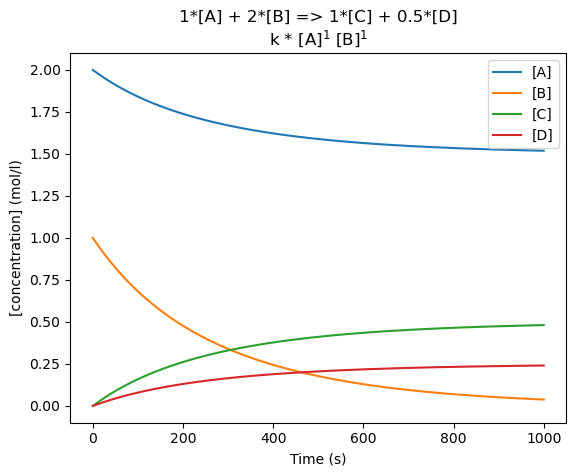

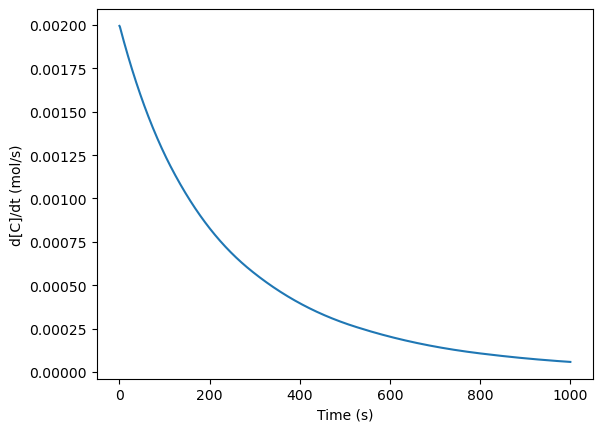

In [3]:
# initial concentrations
initial_concentration_A = 2 # mol/l
initial_concentration_B = 1 # mol/l
initial_concentration_C = 0 # mol/l
initial_concentration_D = 0 # mol/l

reaction_constant_k = 0.001 # 1/s^[exponent_A + exponent_B]

reaction = run_process(initial_concentration_A, 
                       initial_concentration_B, 
                       initial_concentration_C, 
                       initial_concentration_D,
                       reaction_constant_k)
make_figure(reaction)

### BONUS PART

In [4]:
## BONUS CODE - DO NOT MODIFY THIS CELL

# stoichiometry
stoich_factor_a = 1 
stoich_factor_b = 2
stoich_factor_c = 1
stoich_factor_d = 0.5

# kinetics
exponent_A = 1
exponent_B = 1

# make labels to use as title
reaction_stoich = str(stoich_factor_a) + '*[A] + ' + str(stoich_factor_b) + \
                '*[B] => ' + str(stoich_factor_c) + '*[C] + ' + str(stoich_factor_d) + '*[D]'
reaction_kin = 'k * [A]$^{' + str(exponent_A) + '}$ [B]$^{' + str(exponent_A) + '}$'

def run_process_bonus(A, B, C, D, k, dA, dB, kC):
   
    t_end = 1000
    time_points = np.linspace(0, t_end, 1001)

    # the rate of change for C and D
    # takes the time, and current concentration of A, B, C, D as inputs
    # A, B, C, D concentrations are bundled in an array.
    # returns the time derivative of A,B,C,D in an array as an output
    def rate(t, ABCD):
        A = ABCD[0]
        B = ABCD[1]

        dAdt = -k * np.power(A, exponent_A) * np.power(B, exponent_B) 
        dBdt = stoich_factor_b/stoich_factor_a * dAdt 
        dCdt = -stoich_factor_c/stoich_factor_a * dAdt
        dDdt = -stoich_factor_d/stoich_factor_a * dAdt

        return np.array([dAdt + dA, dBdt + dB, dCdt  - kC * C, dDdt])

    ABCD_init = np.array([
        A, B, C, D
        ])

    reaction = solve_ivp(rate, (0, t_end), ABCD_init, t_eval=time_points, method='BDF')
    return reaction


The following cell looks pretty similar. Only you have more 'knobs to turn' this time. 
You can add material A and B as the process is going on. 
Furthrmore, you can switch on evaporation of the toxic component D. 

Valuable product created:  0.2500000219401248  mol/l
Maximal production of toxic C:  0.019515883364719974  mol/(ls)


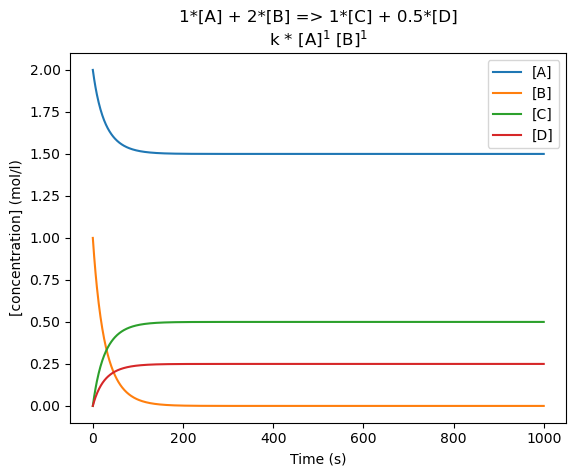

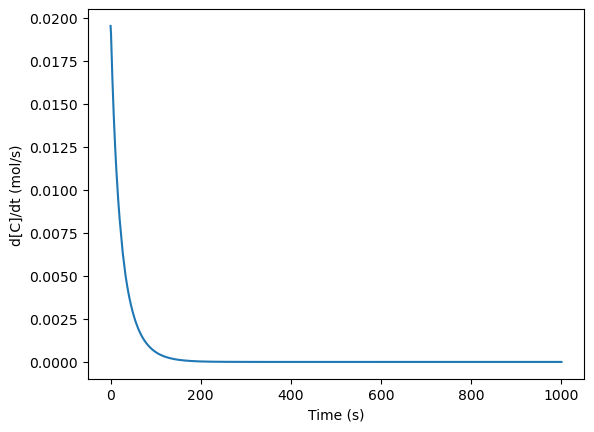

In [14]:
# initial concentrations
initial_concentration_A = 2 # mol/l
initial_concentration_B = 1 # mol/l
initial_concentration_C = 0 # mol/l
initial_concentration_D = 0 # mol/l

reaction_constant_k = 0.01 # 1/s^[exponent_A + exponent_B]

A_added = 0.0 # mol/s # realistic example value: 1e-2 mol/(ls)
B_added = 0.0 # mol/s # realistic example value: 1e-2 mol/(ls)

# How could you increase the evaporation rate in real life?
kC = 0 # realistic example value: 1e-2 # /mol s evaporation rate ==> this is different! 
# (keep this positive)

reaction = run_process_bonus(initial_concentration_A, 
                       initial_concentration_B, 
                       initial_concentration_C, 
                       initial_concentration_D,
                       reaction_constant_k,
                       A_added,
                       B_added, 
                       kC)
make_figure(reaction)

D_yield = reaction.y[3, -1]
C_rate = np.gradient(reaction.y[2, :], reaction.t).max()

print( 'Valuable product created: ', D_yield, ' mol/l')
print('Maximal production of toxic C: ', C_rate, ' mol/(ls)')